In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [21]:
houses = pd.read_csv('files/USA_Housing.csv')
houses.dropna(inplace=True)
houses.drop_duplicates(inplace=True)
corr_matrix = houses.corr()
c = houses['Avg. Area House Age'].corr(houses['Price'])
print(c)


0.45254253717875575


In [22]:
df = houses
target_corr = corr_matrix['Price']
highest_correlation_feature = target_corr.drop('Price').abs().idxmax()
print("highest correlarion ")
print(highest_correlation_feature)
print("end")

highest correlarion 
Avg. Area Income
end


In [23]:
houses.fillna(houses.mean(),inplace=True)
houses.drop_duplicates(inplace=True)

C:\Users\mohamed irfaan\AppData\Local\Temp\ipykernel_9176\997218401.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  houses.fillna(houses.mean(),inplace=True)


In [24]:
houses = houses.drop('Address',axis=1)
df = houses
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data,columns=df.columns)
houses = standardized_df

In [25]:
x= houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=houses['Price']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

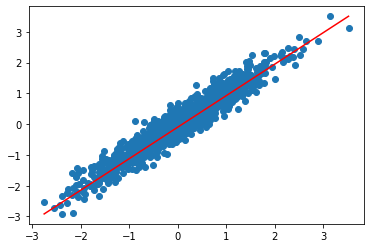

0.0809275879465262
R-squared: 0.9179971706834331


In [27]:
import matplotlib.pyplot as plt
predict = lr.predict(x_test)
plt.scatter(predict,y_test)
plt.plot([min(predict),max(predict)],[min(y_test),max(y_test)],color='red')
plt.show()
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
print(mean_squared_error(y_test,predict))
r2 = r2_score(y_test,predict)
print("R-squared:", r2)

In [28]:
new_data = pd.DataFrame({
    'Avg. Area Income':[79545.46], 
    'Avg. Area House Age':[5.682861], 
    'Avg. Area Number of Rooms':[7.009188],
    'Avg. Area Number of Bedrooms':[4.09], 
    'Area Population':[23089.8]
})
prediction = lr.predict(new_data)
print(prediction)

[61900.28311382]
